## **Fashion-MNIST clothing image classification**

### **1. Import libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### **2. Load the dataset/Explore the data**

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
np.unique(train_y), np.unique(test_y)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

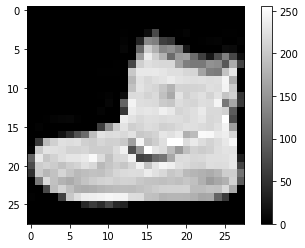

In [ ]:
plt.imshow(train_x[0])
plt.gray()
plt.colorbar()
plt.show()

### **3. Build/Compile/Train the model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(28, 28), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 128)           3712      
                                                                 
 dense_1 (Dense)             (None, 28, 64)            8256      
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                17930     
                                                                 
Total params: 29,898
Trainable params: 29,898
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2288 - accuracy: 0.7840
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4894 - accuracy: 0.8311
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4601 - accuracy: 0.8385
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4345 - accuracy: 0.8487
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4011 - accuracy: 0.8565
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3769 - accuracy: 0.8642
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3609 - accuracy: 0.8695
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3446 - accuracy: 0.8759
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3388 - accuracy: 0.8779
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.324

### **4. Make predictions**

In [ ]:
pred = model.predict(test_x)
pred[0]

array([3.8114361e-15, 3.3184193e-19, 2.1068828e-23, 1.0380607e-23,
       2.6201980e-23, 1.0627116e-05, 1.3231931e-18, 4.5658977e-05,
       6.7399753e-13, 9.9994373e-01], dtype=float32)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

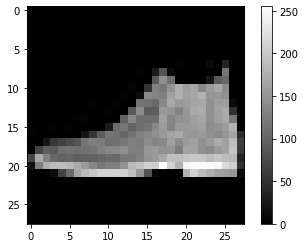

In [ ]:
plt.imshow(test_x[0])
plt.gray()
plt.colorbar()
plt.show()

In [ ]:
scores_0 = []
for i in pred[0]:
    scores_0.append(i)

pred_df_0 = pd.DataFrame({"Class names" : class_names, "Pred-score" : scores_0})
pred_df_0 = pred_df_0.sort_values(by="Pred-score", ascending=False)
pred_df_0

,Class names,Pred-score
9,Ankle boot,9.999437e-01
7,Sneaker,4.565898e-05
5,Sandal,1.062712e-05
8,Bag,6.739975e-13
0,T-shirt/top,3.811436e-15
6,Shirt,1.323193e-18
1,Trouser,3.318419e-19
4,Coat,2.620198e-23
2,Pullover,2.106883e-23
3,Dress,1.038061e-23


In [ ]:
pred[1]

array([2.5750264e-09, 3.1169444e-22, 9.9972981e-01, 5.6160428e-25,
       2.9520912e-05, 7.0095851e-21, 2.4058987e-04, 0.0000000e+00,
       8.1995933e-30, 2.6074788e-27], dtype=float32)

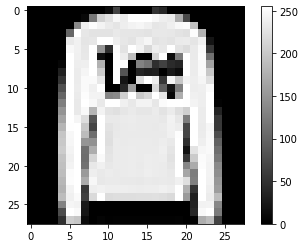

In [ ]:
plt.imshow(test_x[1])
plt.gray()
plt.colorbar()
plt.show()

In [ ]:
scores_1 = []
for i in pred[1]:
    scores_1.append(i)

pred_df_1 = pd.DataFrame({"Class names" : class_names, "Pred-score" : scores_1})
pred_df_1 = pred_df_1.sort_values(by="Pred-score", ascending=False)
pred_df_1

,Class names,Pred-score
2,Pullover,9.997298e-01
6,Shirt,2.405899e-04
4,Coat,2.952091e-05
0,T-shirt/top,2.575026e-09
5,Sandal,7.009585e-21
1,Trouser,3.116944e-22
3,Dress,5.616043e-25
9,Ankle boot,2.607479e-27
8,Bag,8.199593e-30
7,Sneaker,0.000000e+00
